In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
import numpy as np

In [2]:
task1 = fetch_20newsgroups(subset='all', categories = ['rec.motorcycles','sci.electronics'])

In [3]:
df = pd.DataFrame(task1['data'])

In [4]:
df['Target'] = task1['target']

In [5]:
df

,0,Target
0,"Subject: Re: Power, signal surges in home...\n...",1
1,From: cjackson@adobe.com (Curtis Jackson)\nSub...,0
2,From: fritzm@panix.com (Fritz Mueller)\nSubjec...,1
3,From: hesh@cup.hp.com (Chris Steinbroner)\nSub...,0
4,From: asper@calvin.uucp (Alan E. Asper)\nSubje...,0
...,...,...
1975,From: jeff@mri.com (Jonathan Jefferies)\nSubje...,0
1976,From: tony@morgan.demon.co.uk (Tony Kidson)\nS...,0
1977,From: lusky@ccwf.cc.utexas.edu (Jonathan R. Lu...,0
1978,From: oscar@oscar.austin.ibm.com (Oscar R. Mit...,1


In [6]:
docs_train, docs_test, y_train, y_test = train_test_split(df[0] , df.Target, test_size = 0.20, random_state = 12)

# TASK2

In [7]:
import matplotlib.pyplot as plt
def test(docs_train, docs_test, y_train, y_test):
    TFIDF = TfidfVectorizer(max_features=2000,sublinear_tf=True,max_df=0.5,min_df=1,use_idf=True,smooth_idf=True)
    TFIDFobject = TFIDF.fit_transform(docs_train) 
    TFID1= TFIDFobject.toarray()
    TFIDFobject1 = TFIDF.transform(docs_test) 
    TFID2= TFIDFobject1.toarray()
    clf = MultinomialNB()
    clf.fit(TFID1, y_train)
    y_pred_test = clf.predict(TFID2)
    cm = confusion_matrix(y_test,y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)

    disp.plot()
    plt.show()
    d ={"Actual": y_test[:30], 'Predicted': y_pred_test[:30]}
    print(classification_report(y_test,y_pred_test))
    display(pd.DataFrame(d).reset_index().drop('index',axis=1))

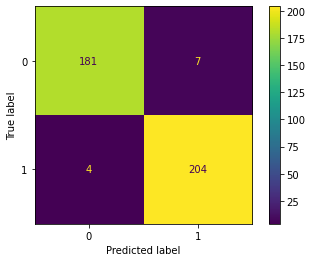

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       188
           1       0.97      0.98      0.97       208

    accuracy                           0.97       396
   macro avg       0.97      0.97      0.97       396
weighted avg       0.97      0.97      0.97       396



,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,0,0
9,1,1


In [8]:
test(docs_train, docs_test, y_train, y_test)

# TASK3

In [9]:
task3 = fetch_20newsgroups(subset='all', categories = ['rec.motorcycles','sci.electronics', 'rec.sport.baseball','comp.graphics'])

In [10]:
df = pd.DataFrame(task3['data'])

In [11]:
df['Target'] = task3['target']
df.head()

,0,Target
0,From: jussi@tor.abo.fi (Jussi Laaksonen DC)\nS...,0
1,From: rws@cs.arizona.edu (Ronald W. Schmidt)\n...,0
2,From: sburton@dres.dnd.ca (Stan Burton)\nSubje...,3
3,From: cjackson@adobe.com (Curtis Jackson)\nSub...,1
4,From: warren@eggo.csee.usf.edu (Warren Gaiewsk...,3


In [12]:
docs_train, docs_test, y_train, y_test = train_test_split(df[0] , df.Target, test_size = 0.20, random_state = 12)

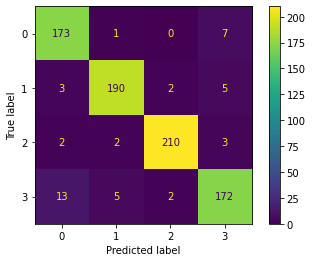

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       181
           1       0.96      0.95      0.95       200
           2       0.98      0.97      0.97       217
           3       0.92      0.90      0.91       192

    accuracy                           0.94       790
   macro avg       0.94      0.94      0.94       790
weighted avg       0.94      0.94      0.94       790



,Actual,Predicted
0,3,3
1,2,2
2,1,1
3,2,2
4,2,2
5,3,1
6,2,2
7,0,0
8,0,0
9,2,2


In [13]:
test(docs_train, docs_test, y_train, y_test )

# TASK4

In [14]:
data_new = ['What are the different parts of the computer?','Playing baseball is good for health','In which games you are interested','It is the unknown around the corner that turns my wheels','I am interested to increase the picture resolution of my computer', 'The team might not win if there is rain.']

In [15]:
df = pd.DataFrame(data_new)

In [23]:
TFIDF = TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,use_idf=True,smooth_idf=True)
TFIDFobject = TFIDF.fit_transform(docs_train) 
TFID1= TFIDFobject.toarray()

FIDFobject1 = TFIDF.transform(df[0]) 
TFID2= FIDFobject1.toarray()

clf = MultinomialNB()

clf.fit(TFID1, y_train)

MultinomialNB()

In [25]:
df['Predictions'] = clf.predict(TFID2)

In [27]:
df['Names'] = df['Predictions'].apply(lambda x: task3.target_names[x])

In [29]:
df.style.hide_index()

C:\Users\yogesh\AppData\Local\Temp\ipykernel_13752\496160328.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df.style.hide_index()


0,Predictions,Names
What are the different parts of the computer?,3,sci.electronics
Playing baseball is good for health,2,rec.sport.baseball
In which games you are interested,2,rec.sport.baseball
It is the unknown around the corner that turns my wheels,1,rec.motorcycles
I am interested to increase the picture resolution of my computer,0,comp.graphics
The team might not win if there is rain.,2,rec.sport.baseball
